In [27]:
import pandas as pd

file_path = 'gr7.csv'
data = pd.read_csv(file_path, skiprows=7) 


data.columns = ["Time (sec)", "Extension (mm)", "Load (N)", "Displacement (mm)", "Strain"]
data = data.iloc[1:]  
data = data.apply(pd.to_numeric, errors="coerce")
data = data.dropna() 

original_length = 198.0  
data["Strain"] = data["Extension (mm)"] / original_length 

diameter = 8.65  
area = 3.14159 * (diameter / 2) ** 2  
data["Stress (MPa)"] = data["Load (N)"] / area 


data.head()


,Time (sec),Extension (mm),Load (N),Displacement (mm),Strain,Stress (MPa)
1,0.0000,-0.00280,-840.50894,0.0,-1.414141e-05,-14.302785
2,1.0000,-0.00444,-860.01158,0.0,-2.242424e-05,-14.634658
3,2.0000,-0.00353,-807.72638,0.0,-1.782828e-05,-13.744930
4,3.0000,-0.00035,-713.44972,0.0,-1.767677e-06,-12.140642
5,3.0628,-0.00014,-699.72277,0.0,-7.070707e-07,-11.907053


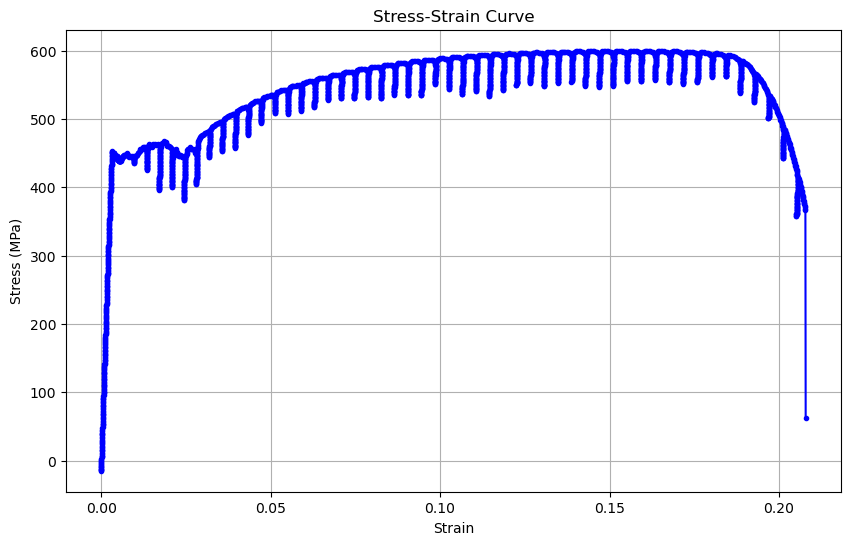

In [29]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.plot(data["Strain"], data["Stress (MPa)"], marker='o', linestyle='-', color='b', markersize=3)


plt.xlabel("Strain")
plt.ylabel("Stress (MPa)")
plt.title("Stress-Strain Curve")
plt.grid(True)


plt.show()

In [31]:
observation_table = pd.DataFrame({
    "Metric": ["Max Stress (MPa)", "Max Strain", "Min Stress (MPa)", "Min Strain"],
    "Value": [
        data["Stress (MPa)"].max(),
        data["Strain"].max(),
        data["Stress (MPa)"].min(),
        data["Strain"].min()
    ]
})


observation_table

,Metric,Value
0,Max Stress (MPa),599.751978
1,Max Strain,0.207858
2,Min Stress (MPa),-14.634658
3,Min Strain,-0.000022


In [33]:

data["Young Modulus (GPa)"] = data["Stress (MPa)"] / data["Strain"] / 1000  # Convert MPa to GPa

major_indices = [
    data["Stress (MPa)"].idxmax(),  
    data["Strain"].idxmax(),      
] + list(data.index[::len(data) // 5]) 


major_indices = list(set(major_indices))
observation_table = data.loc[major_indices, [
    "Time (sec)", "Extension (mm)", "Load (N)", "Strain", "Stress (MPa)", "Young Modulus (GPa)"
]]


observation_table = observation_table.sort_values(by="Time (sec)")


observation_table.reset_index(drop=True)


,Time (sec),Extension (mm),Load (N),Strain,Stress (MPa),Young Modulus (GPa)
0,0.00000,-0.00280,-840.50894,-0.000014,-14.302785,1011.411219
1,238.57279,5.60215,25811.00464,0.028294,439.221084,15.523643
2,492.07079,14.79223,31433.47502,0.074708,534.897621,7.159822
3,732.22978,23.46711,32051.53942,0.118521,545.415108,4.601853
4,912.99998,30.15802,35244.66753,0.152313,599.751978,3.937622
5,976.86078,32.41316,34669.54231,0.163703,589.965178,3.603879
6,1208.70077,41.15595,3697.40725,0.207858,62.918094,0.302697


In [35]:
num_rows = 15
selected_indices = [
    data["Stress (MPa)"].idxmax(), 
    data["Strain"].idxmax(),      
] + list(data.index[::len(data) // (num_rows - 2)])  

# Drop duplicates and create a reduced table
selected_indices = list(set(selected_indices))[:num_rows]
observation_table_15 = data.loc[selected_indices, [
    "Time (sec)", "Extension (mm)", "Load (N)", "Strain", "Stress (MPa)", "Young Modulus (GPa)"
]]


observation_table_15 = observation_table_15.sort_values(by="Time (sec)")


observation_table_15.reset_index(drop=True)

,Time (sec),Extension (mm),Load (N),Strain,Stress (MPa),Young Modulus (GPa)
0,0.00000,-0.00280,-840.50894,-0.000014,-14.302785,1011.411219
1,64.22680,0.62963,26295.86458,0.003180,447.471856,140.716655
2,198.36279,4.15607,25678.80154,0.020990,436.971408,20.817825
3,265.99999,6.35513,28072.24989,0.032097,477.700275,14.883197
4,362.99999,10.14469,30713.46283,0.051236,522.645307,10.200782
5,569.99999,17.83452,34125.22078,0.090073,580.702560,6.446998
6,664.20778,21.10050,32056.85616,0.106568,545.505582,5.118841
7,749.81178,24.28016,33059.79967,0.122627,562.572486,4.587670
8,843.48278,27.52197,34171.60511,0.139000,581.491873,4.183399
9,912.99998,30.15802,35244.66753,0.152313,599.751978,3.937622


In [37]:

replacement_row_20 = data[(data["Time (sec)"] >= 20) & (data["Time (sec)"] <= 21)].iloc[0]


replacement_row_20_aligned = replacement_row_20[
    ["Time (sec)", "Extension (mm)", "Load (N)", "Strain", "Stress (MPa)", "Young Modulus (GPa)"]
]

observation_table_15.iloc[0] = replacement_row_20_aligned.values

observation_table_15 = observation_table_15.sort_values(by="Time (sec)").reset_index(drop=True)


observation_table_15


,Time (sec),Extension (mm),Load (N),Strain,Stress (MPa),Young Modulus (GPa)
0,20.00000,0.19445,8287.13179,0.000982,141.020586,143.595146
1,64.22680,0.62963,26295.86458,0.003180,447.471856,140.716655
2,198.36279,4.15607,25678.80154,0.020990,436.971408,20.817825
3,265.99999,6.35513,28072.24989,0.032097,477.700275,14.883197
4,362.99999,10.14469,30713.46283,0.051236,522.645307,10.200782
5,569.99999,17.83452,34125.22078,0.090073,580.702560,6.446998
6,664.20778,21.10050,32056.85616,0.106568,545.505582,5.118841
7,749.81178,24.28016,33059.79967,0.122627,562.572486,4.587670
8,843.48278,27.52197,34171.60511,0.139000,581.491873,4.183399
9,912.99998,30.15802,35244.66753,0.152313,599.751978,3.937622
